In [ ]:
from gensim.models import Word2Vec
import gensim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
import numpy as np
import sklearn as sk
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
import operator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2021-11-15 13:05:07--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.244.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.244.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  81.1MB/s    in 21s     

2021-11-15 13:05:29 (74.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
model.most_similar("black")

[('white', 0.8092213869094849),
 ('Responded_Letterman_How', 0.6182776689529419),
 ('blacks', 0.589222252368927),
 ('crypt_inscribed', 0.5855617523193359),
 ('transporting_petrochemicals', 0.5834174156188965),
 ('brown', 0.5766680240631104),
 ('Shilah_Phillips', 0.5763779878616333),
 ('women_dating_interracially', 0.5670552253723145),
 ('wrote_Newitz', 0.5604413747787476),
 ('blue', 0.5492397546768188)]

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx?raw=true

--2021-11-15 13:08:14--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx [following]
--2021-11-15 13:08:14--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx [following]
--2021-11-15 13:08:14--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised

In [ ]:
data=pd.read_excel("assignment3_data.xlsx?raw=true")

In [ ]:
vocab=np.array(data).flatten()

In [ ]:
vocab_plus_similar_words=[]

In [ ]:
#model.most_similar("wuhan")

In [ ]:
for i in vocab:
  for j in i.split(" "):
    try:
      j=j.strip(",")
      vocab_plus_similar_words.append(j.lower())
      for w in model.most_similar(j):
        vocab_plus_similar_words.append(w[0].lower())
    except KeyError:
      pass

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
nltk.pos_tag(["benzema"])[0][1]

'NN'

In [ ]:
filtered_words=[]
for i in nltk.pos_tag(vocab_plus_similar_words):
  if i[0] not in stop_words:
    if i[1]=="NN" or i[1][0]=="J" or i[1]=="NNS" :
      filtered_words.append(i[0])

In [ ]:
filter_words=list(set(filtered_words))

In [ ]:
len(vocab_plus_similar_words),len(set(vocab_plus_similar_words)),len(filter_words)

(2706, 1481, 1055)

In [ ]:
vocab_plus_similar_words=list(set(vocab_plus_similar_words))

In [ ]:
len(vocab_plus_similar_words)

1481

In [ ]:
vectors=[]
vocab_final=[]
for i in filter_words:
  try:
    vectors.append(model[i.rstrip(".")])
    vocab_final.append(i)
  except KeyError:
    print(i)

wolters_kluwer_cautions
gazillionaire_carella
i'm
peaceful_solution
seniormed_llc_pharmacy
customized_mii
samiha
nnsa_bodman
al_haiman
vanderkar
chief_ali_mamluk
world_social_forum
judeo_christian_morality
administrator_gary_kubic
character_trustworthiness
policy_csdp
by_ellen_lyon
msim_strives
banda_aceh_aceh
idle_stop
national_intelligence_dni
cake_showroom
al_maalif
wheels_antuan
lg_thinq
safriya
multiple_sclerosis_spms
kept_secret
chosen_vessels_christian
remains_confident
biodegradable_containers_cost
unity_dru
equitymarketreport.com_viewers_should
coach_randy_heethuis
character_counts
really_necessary
al_qura_mosque
leadership_qualities
life_cookie_diet
poll_certainty
adverse_effect
el_fahm
meadow_valleys
mingus_ah
programming_oop
uranium_iocg
youth_leadership
chief_negotiator
francois_bissonnette_p.geo
aren'ti
rivals_agree
harold_delaria
current_liabilities_current_maturities
than_aung
----------------_stockholders_equity
applera_corporation_consists
huge_mansions
muslims_pls_re

In [ ]:
len(vocab_final),len(vectors)

(888, 888)

In [ ]:
#sns.heatmap(similarity_matrix)

In [ ]:
print(model.similarity('woman', 'woman'))

In [ ]:
similarity_matrix[100][200],similarity_matrix[200][100]

(0.0, 0.0)

In [ ]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(vectors)
  error.append(kmeans.inertia_)

In [ ]:
def evaluation(x,y):
  score=0
  for i in x:
    syn1=wn.synsets(i.lower())
    cur_scores=[0]
    for j in y:
      syn2=wn.synsets(j.lower())
      if len(syn1)*len(syn2)>0 and wn.wup_similarity(syn1[0],syn2[0])!=None: 
        cur_scores.append(wn.wup_similarity(syn1[0],syn2[0]))
    #print(type(score),type(cur_scores))
    score+=max(cur_scores)
  return score/len(x)

Text(0, 0.5, 'Cummulative Inertia')

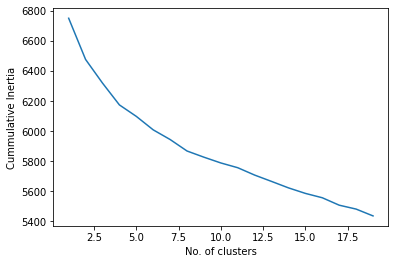

In [ ]:
plt.plot(list(range(1,20)),error)
plt.xlabel("No. of clusters")
plt.ylabel("Cummulative Inertia")

In [ ]:
kmeans_best = KMeans(n_clusters=6, random_state=0).fit(vectors)

In [ ]:
labels=kmeans_best.labels_

In [ ]:
FINAL_WORDS=[]
for c in kmeans_best.cluster_centers_:
  for index,j in enumerate(vectors):
    if np.sum(np.abs(c-j))<18:
      #print("..")
      print(vocab_final[index],end=" ")
      FINAL_WORDS.append(vocab_final[index].strip("."))

commercialize_duloxetine_hydrochloride kindness_gentleness bicommunal_bizonal_federation knowlegable knowlegeable togehter implantable_neurostimulation_devices grassroots_volcanogenic_massive_sulphide isno kindness_gentleness roofers_painters exprience compro_mise roti_kapda_aur_makaan dishonesty_incompetence commercialize_duloxetine_hydrochloride hospice_palliative unimpeachable_honesty udner idealized_womanhood experiece thepolitical compro_mise commercialize_duloxetine_hydrochloride unimpeachable_honesty bicommunal_bizonal_federation 

In [ ]:
evaluation(FINAL_WORDS,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.0

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_vectors=pca.fit_transform(vectors)

In [ ]:
pca.transform(kmeans_best.cluster_centers_)

array([[-0.39542962,  0.44324501],
       [-0.41585044, -0.102448  ],
       [ 0.27722044, -0.88632013],
       [ 0.29963586, -0.74438858],
       [ 0.24270974,  0.76424598],
       [ 1.08604972,  0.2168501 ]])

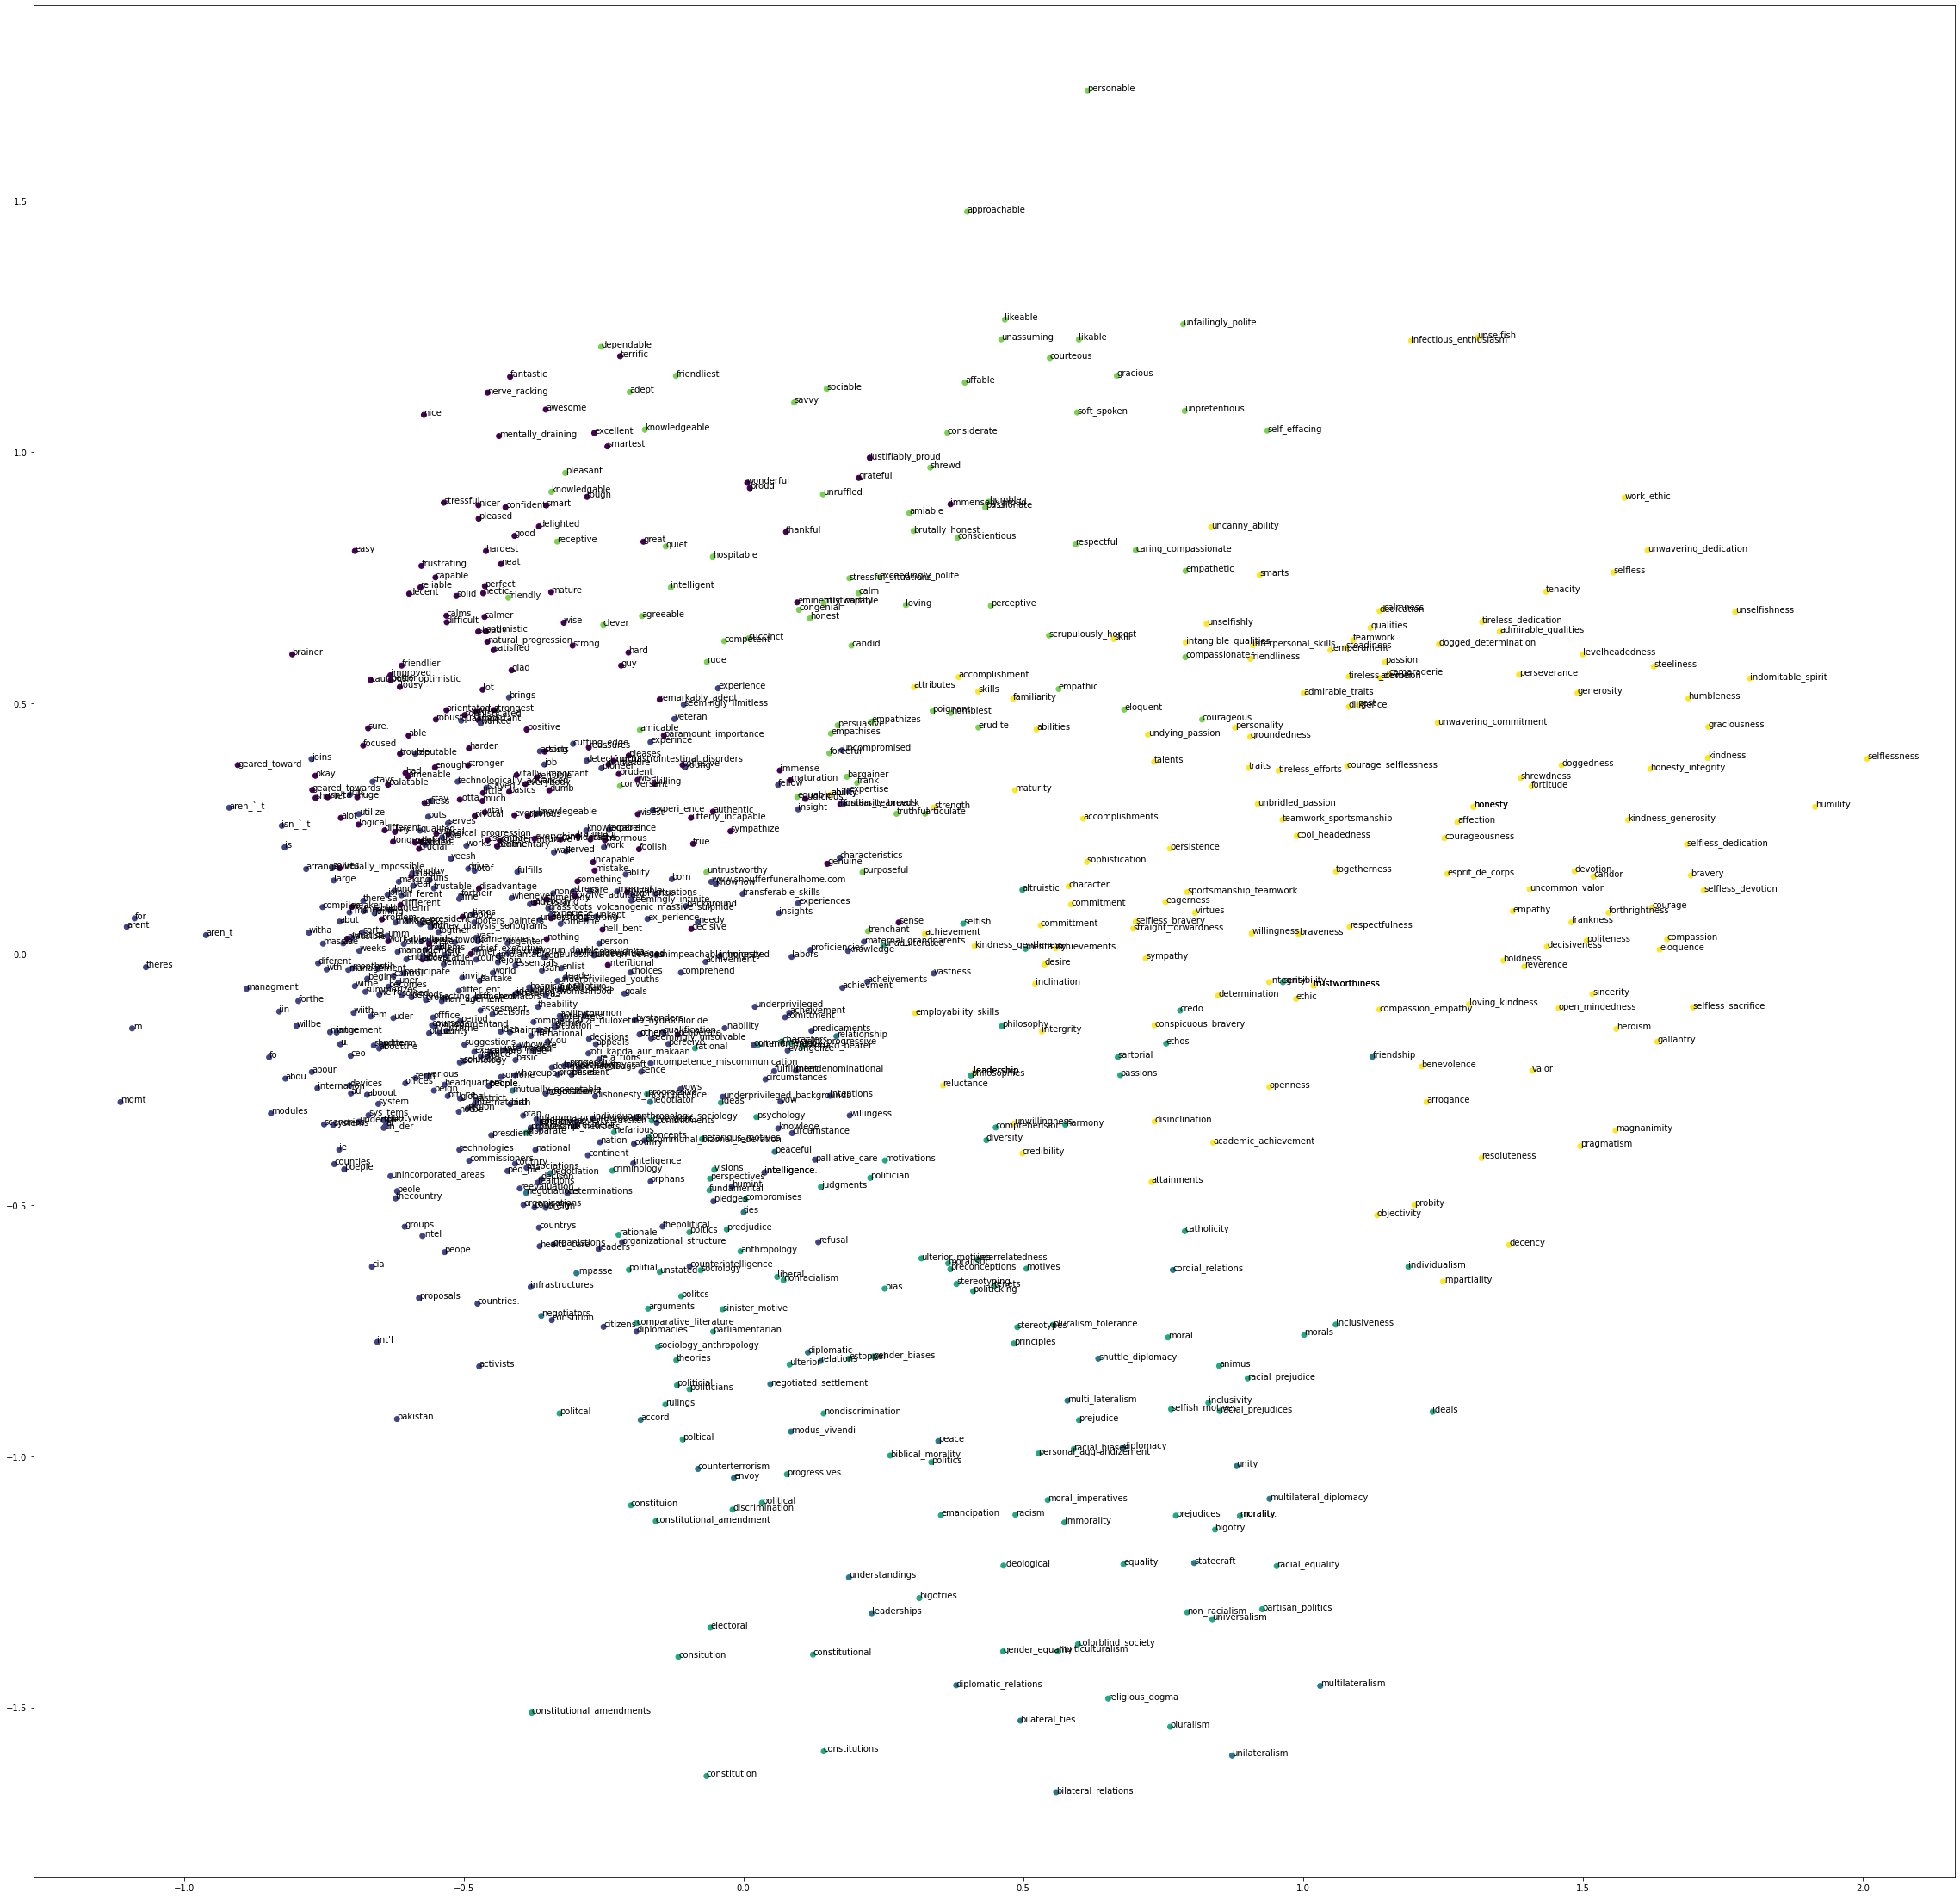

In [ ]:
plt.figure(figsize=(40,40))
plt.scatter(pca_vectors[:,0],pca_vectors[:,1],c=labels)
for i,txt in enumerate(vocab_final):
  plt.annotate(txt,(pca_vectors[i][0],pca_vectors[i][1]))